<a href="https://colab.research.google.com/github/BikramKC7/Fusemachines-Assessment/blob/main/Feature_Engineering_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering & Model Selection

##### [TOTAL POINTS: 22]

##  Learning Objectives

By the end of this assignment, students should be able to:

* Apply necessary preprocessing steps to prepare the data for modeling.
* Perform feature engineering such as handling missing values, binning numerical variables, and extracting new features.
* Train and fine-tune a **Decision Tree classifier** using **scikit-learn**, and evaluate it using **cross-validation** and **validation splits**.
* Evaluate and compare multiple classification models (e.g., **Random Forest**, **XGBoost**) and build an effective **ensemble model**.

## Problem Description

The **Titanic** was a British passenger liner that tragically sank during its maiden voyage in 1912. The dataset you'll work with contains information about the passengers on board — such as their age, sex, ticket class, and whether they survived.

Your task is to build a machine learning pipeline to **predict whether a passenger survived the Titanic disaster** using the provided features. Throughout the assignment, you will preprocess the data, engineer meaningful features, build various classifiers, and evaluate their performance.

Let’s begin by importing the necessary libraries.

In [67]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost scikit-optimize -q

In [100]:
# Task: Import necessary libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline
sns.set()

### Load the Dataset <span style="float: right;">[1 pt]</span>

Load the `train.csv` and `test.csv` files using pandas.

In [101]:
### Ex-1-Task-1
# Load the Titanic dataset

df_train = None
df_test = None

### BEGIN SOLUTION
from google.colab import drive
drive.mount('/content/drive')
df_train = pd.read_csv('/content/drive/MyDrive/BikramKC_Fusemachines/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/BikramKC_Fusemachines/test.csv')
### END SOLUTION

df_train.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
# INTENTIONALLY LEFT BLANK

### Store Target & Concatenate Datasets <span style="float: right;">[1 pt]</span>

- Store the `Survived` column from the training set into a separate variable.
- Concatenate the training set (without the `Survived` column) and the test set into a single DataFrame called `data`.


In [103]:
### Ex-1-Task-2
# Task: Store the target variable in a separate variable and concatenate train and test data

survived_train = None
data = None

### BEGIN SOLUTION
# Store the target variable
survived_train = df_train['Survived']
# Drop the target column from training set
df_train_drop = df_train.drop('Survived', axis=1)
# Concatenate train and test data
data = pd.concat([df_train_drop, df_test], axis=0, ignore_index=True)
### END SOLUTION

In [104]:
# INTENTIONALLY LEFT BLANK

In [105]:
# Task: View basic info of the concatenated dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### Extract Title from Name <span style="float: right;">[2 pts]</span>

Extract the passenger's title (such as **Mr**, **Mrs**, **Miss**, etc.) from the `Name` column using a regular expression,  
and store it in a new column called `Title`.

For example, given names like:  
- `Braund, Mr. Owen Harris` → Title: `Mr`
- `Heikkinen, Miss. Laina` → Title: `Miss`

Use a regex pattern that captures the word that appears between a space and a period following the surname.

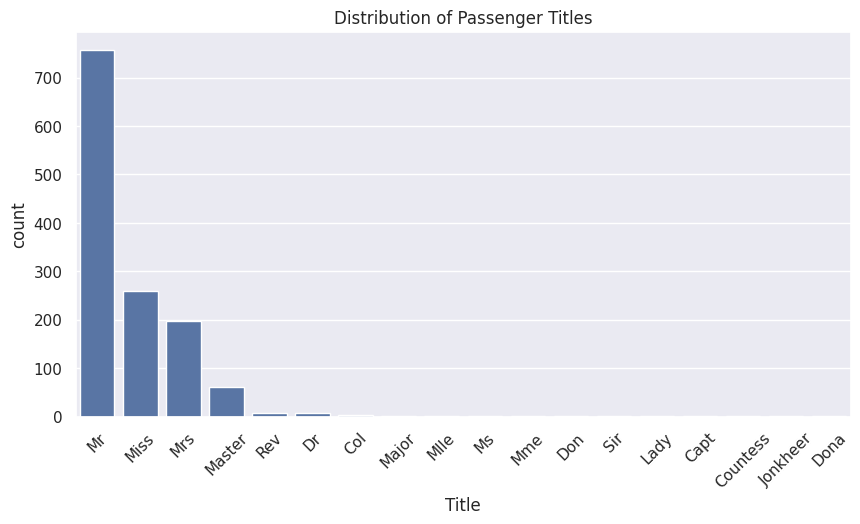

In [106]:
### Ex-2-Task-1
# Task: Extract 'Title' from Name column and plot distribution

data['Title'] = None

### BEGIN SOLUTION
# Extract Title from Name using regex
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
# Optional: Strip whitespace just in case
data['Title'] = data['Title'].str.strip()
# Plot distribution of titles
plt.figure(figsize=(10, 5))
sns.countplot(x='Title', data=data, order=data['Title'].value_counts().index)
plt.title("Distribution of Passenger Titles")
plt.xticks(rotation=45)
plt.show()
### END SOLUTION

In [75]:
# INTENTIONALLY LEFT BLANK

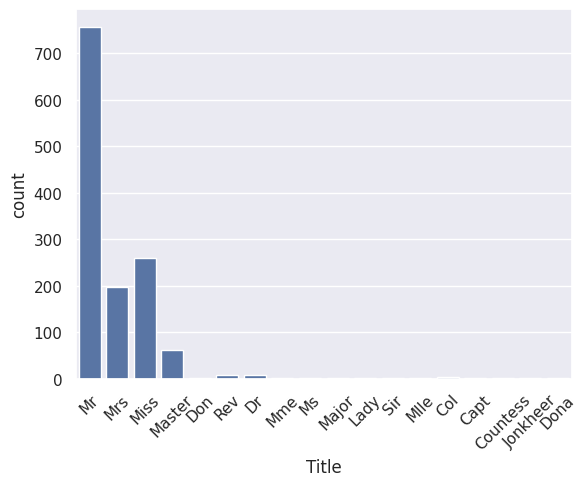

In [107]:
# Task: Plot the title count
sns.countplot(x='Title', data=data)
plt.xticks(rotation=45)
plt.show()

### Normalize and Group Titles <span style="float: right;">[2 pts]</span>

- Normalize similar titles by replacing:  
    - `'Mlle'` with `'Miss'`  
    - `'Mme'` with `'Mrs'`  
    - `'Ms'` with `'Miss'`

- Then, group rare titles such as `'Don'`, `'Dona'`, `'Rev'`, `'Dr'`, `'Major'`, `'Lady'`, `'Sir'`, `'Col'`, `'Capt'`, `'Countess'`, and `'Jonkheer'` into a single category called `'Special'`.


In [77]:
### Ex-2-Task-2
# Task: Normalize rare titles to 'Special' and others

### BEGIN SOLUTION
# Normalize similar titles
data['Title'] = data['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})
# Group rare/special titles into 'Special'
special_titles = ['Don', 'Dona', 'Rev', 'Dr', 'Major', 'Lady', 'Sir',
                  'Col', 'Capt', 'Countess', 'Jonkheer']
data['Title'] = data['Title'].replace(special_titles, 'Special')
### END SOLUTION

In [78]:
# INTENTIONALLY LEFT BLANK

### Create Binary Cabin Indicator  <span style="float: right;">[1 pt]</span>

Create a new binary column `Has_Cabin` that indicates whether a passenger has cabin information (`True` if present, `False` if missing).

In [79]:
### Ex-3-Task-1
# Task: Add a binary column for presence of Cabin info

data['Has_Cabin'] = None

### BEGIN SOLUTION
# Create binary column indicating presence of cabin info
data['Has_Cabin'] = data['Cabin'].notnull()
### END SOLUTION

In [80]:
# INTENTIONALLY LEFT BLANK

In [81]:
# Task: Drop irrelevant columns
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

### Impute Missing Values  <span style="float: right;">[2 pts]</span>

Fill missing values in the dataset as follows:  
- Replace missing `Age` values with the median age.  
- Replace missing `Fare` values with the median fare.  
- Replace missing `Embarked` values with the most common port `'S'`.

In [82]:
### Ex-4-Task-1
# Task: Impute missing values in Age, Fare, Embarked

### BEGIN SOLUTION
# Fill missing Age values with median age
data['Age'].fillna(data['Age'].median(), inplace=True)
# Fill missing Fare values with median fare
data['Fare'].fillna(data['Fare'].median(), inplace=True)
# Fill missing Embarked values with most common port 'S'
data['Embarked'].fillna('S', inplace=True)
### END SOLUTION


/tmp/ipython-input-82-1359517347.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-82-1359517347.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [83]:
# INTENTIONALLY LEFT BLANK

### Bin Age and Fare into Categories  <span style="float: right;">[2 pts]</span>

- Convert the numerical columns `Age` and `Fare` into categorical variables by dividing them into 4 equal-sized groups (quartiles).  
- Store the group labels in new columns `CatAge` and `CatFare`.  
- Drop the original `Age` and `Fare` columns after binning.

In [84]:
### Ex-4-Task-2
# Task: Bin Age and Fare into categorical variables

data['CatAge'] = None
data['CatFare'] = None

### BEGIN SOLUTION
# Bin Age into 4 quartiles and create CatAge
data['CatAge'] = pd.qcut(data['Age'], 4, labels=False)
# Bin Fare into 4 quartiles and create CatFare
data['CatFare'] = pd.qcut(data['Fare'], 4, labels=False)
# Drop original Age and Fare columns
data.drop(['Age', 'Fare'], axis=1, inplace=True)
### END SOLUTION

In [85]:
# INTENTIONALLY LEFT BLANK

### Create Family Size and Drop Columns  <span style="float: right;">[1 pt]</span>

Create a new column `Fam_Size` by summing `SibSp` and `Parch`, then drop the original `SibSp` and `Parch` columns.

In [86]:
### Ex-5-Task-1
# Task: Create family size and drop SibSp, Parch

### BEGIN SOLUTION
# Create Fam_Size by summing SibSp and Parch
data['Fam_Size'] = data['SibSp'] + data['Parch']
# Drop SibSp and Parch columns
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
### END SOLUTION

In [87]:
# INTENTIONALLY LEFT BLANK

### One-Hot Encode Categorical Variables  <span style="float: right;">[1 pt]</span>

Convert categorical variables into one-hot encoded dummy variables, dropping the first category to avoid multicollinearity.


In [88]:
### Ex-5-Task-2

data_dum = None

### BEGIN SOLUTION
# One-hot encode categorical variables, drop first category to avoid dummy variable trap
data_dum = pd.get_dummies(data, drop_first=True)
### END SOLUTION

In [89]:
# INTENTIONALLY LEFT BLANK

In [90]:
# Task: Split data into training and test sets
data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

X = data_train.values
test = data_test.values
y = survived_train.values

### Tune Decision Tree with RandomizedSearchCV  <span style="float: right;">[3 pts]</span>

- Use `RandomizedSearchCV` to tune a `DecisionTreeClassifier`’s `max_depth` parameter, searching over values from 1 to 9, with a fixed random seed.
- Perform 5 iterations with 5-fold cross-validation and fit the model to the training data.

**Note:** Import libraries inside `begin solution` and `end solution`

In [91]:
### Ex-6-Task-1

seed=42
np.random.seed(seed)

param_dist = {}
clf = None     # Decision Tree Classifier
clf_cv = None  # Randomized Search CV

### BEGIN SOLUTION
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
# Parameter distribution for max_depth from 1 to 9
param_dist = {'max_depth': list(range(1,9))}
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=seed)
# Initialize RandomizedSearchCV with 5 iterations, 5-fold CV
clf_cv = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    random_state=seed,
    n_jobs=-1,
    verbose=1
)
# Fit model
clf_cv.fit(X, y)
### END SOLUTION

print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuned Decision Tree Parameters: {'max_depth': 8}
Best score is 0.799114933149206


In [92]:
# INTENTIONALLY LEFT BLANK

### Tune Random Forest with RandomizedSearchCV  <span style="float: right;">[3 pts]</span>

Use `RandomizedSearchCV` to tune a `RandomForestClassifier` with parameters:  
- `n_estimators`: [50, 100, 200]  
- `max_depth`: [None, 3, 5, 10]  
- `max_features`: ['sqrt', 'log2']  

Use a fixed random seed, run 5 iterations with 5-fold cross-validation, and fit the model.


In [93]:
### Ex-6-Task-2

rf_param_dist = {}
rf = None     # Random Forest Classifier
rf_cv = None  # Randomized Search CV

### BEGIN SOLUTION
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Define parameter distributions
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'max_features': ['sqrt', 'log2']
}
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=seed)
# Set up RandomizedSearchCV with 5 iterations and 5-fold CV
rf_cv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_dist,
    n_iter=5,
    cv=5,
    random_state=seed,
    n_jobs=-1,
    verbose=1
)
# Fit the model
rf_cv.fit(X, y)
### END SOLUTION

print("Best RF Params:", rf_cv.best_params_)
print("Best CV Score:", rf_cv.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best RF Params: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5}
Best CV Score: 0.8260184545853996


In [94]:
# INTENTIONALLY LEFT BLANK

### Tune XGBoost with Bayesian Optimization  <span style="float: right;">[3 pts]</span>

Use `BayesSearchCV` from `scikit-optimize` to tune an `XGBClassifier`.  
Search over the following hyperparameter space:

- `max_depth`: integers between 3 and 8  
- `n_estimators`: integers between 50 and 100  
- `learning_rate`: log-uniformly between 0.01 and 0.2  

Use 5-fold cross-validation, a fixed random seed, and 20 iterations. Then, fit the model.

In [95]:
### Ex-6-Task-3

param_space = {}      # Parameter Distribuition for BayesSearchCV
xgb_model = None      # Random Forest Classifier
xgb_cv = None         # BayesSearchCV

### BEGIN SOLUTION
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real

# Define parameter search space
param_space = {
    'max_depth': Integer(3, 8),
    'n_estimators': Integer(50, 100),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform')
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)

# Setup BayesSearchCV
xgb_cv = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=20,
    cv=5,
    random_state=seed,
    n_jobs=-1,
    verbose=1
)

# Fit the model
xgb_cv.fit(X, y)
### END SOLUTION

print("Best XGBoost Params:", xgb_cv.best_params_)
print("Best CV Score:", xgb_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:12:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [96]:
# INTENTIONALLY LEFT BLANK